In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import chafer
import tifffile

matplotlib.rc('image', cmap='gray')

Failed to import python modules needed for predicting charge centres. This functionality will be unavailable.


## Retrieve example data

In [2]:
data_crop = tifffile.imread("example_data.tif")
labels_crop = tifffile.imread("example_data_label.tif")

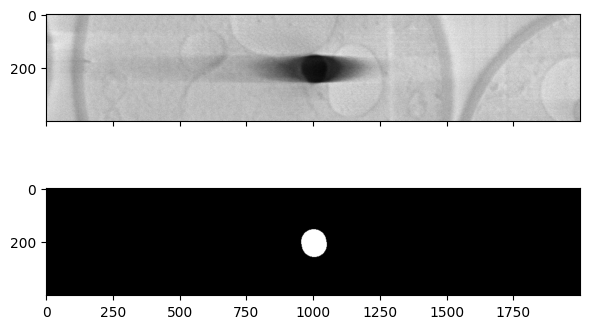

In [3]:
fig, (ax0,ax1)= plt.subplots(2,1, figsize=(6,4), sharex=True)
ax0.imshow(data_crop)
ax1.imshow(labels_crop)
plt.tight_layout()

Setup chafer filter

In [5]:
cfilter = chafer.cls_charge_artifact_suppression_filter()

In [6]:
print(cfilter.nlinesaverage)

20


Full image filter

In [7]:
res = cfilter.charge_artifact_FD_filter_downup_av_prevlines3_2d(data_crop,labels_crop)

c:\Users\Luis-work\miniconda3\envs\okapiem_env\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Luis-work\miniconda3\envs\okapiem_env\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\users\luis-work\desktop\chafer-git\chafer\ch_art_suppr_tools.py:70: RuntimeWarning: overflow encountered in exp
  func = a0 *( - 1.0/ (np.exp((x-x0)/sigma0) + 1) )
c:\users\luis-work\desktop\chafer-git\chafer\ch_art_suppr_tools.py:66: RuntimeWarning: overflow encountered in exp
  func = a0 *( 1.0/ (np.exp((x-x0)/sigma0) + 1) -1.0)


Print optimization results

In [8]:
res

(array([[150, 153, 153, ..., 132, 129, 142],
        [164, 159, 148, ..., 136, 139, 142],
        [161, 167, 164, ..., 138, 147, 144],
        ...,
        [157, 156, 154, ..., 130, 132, 126],
        [158, 159, 161, ..., 124, 128, 133],
        [157, 155, 152, ..., 126, 119, 109]], dtype=uint8),
 [[False,
   [[154,
     'fermidirac_left',
     array([1403.32212628,  255.        ,  180.12300438])],
    [154,
     'fermidirac_right',
     array([1008.41241899,  157.334754  ,   27.73443962])]]],
  [False,
   [[155,
     'fermidirac_left',
     array([1244.47484113,  255.        ,  128.43063827])],
    [155,
     'fermidirac_right',
     array([1031.27898254,  118.7313608 ,   22.90825901])]]],
  [False,
   [[156,
     'fermidirac_left',
     array([1275.54992038,  255.        ,  151.04283905])],
    [156,
     'fermidirac_right',
     array([1010.30936621,  223.22749811,   31.53735732])]]],
  [False,
   [[157,
     'fermidirac_left',
     array([1178.09895149,  255.        ,  121.81443522

Show image after filter

In [12]:
resimg = res[0]

[]

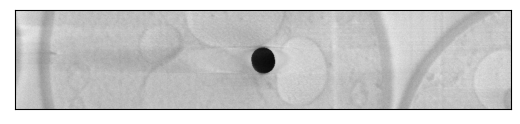

In [13]:
fig, ax = plt.subplots(1,1)
ax.imshow(resimg)
ax.set_xticks([])
ax.set_yticks([])

Save result

In [14]:
tifffile.imwrite("example_data_chaferfiltered.tif",resimg,compression='zlib')

Before and after chafer filter, visualise results

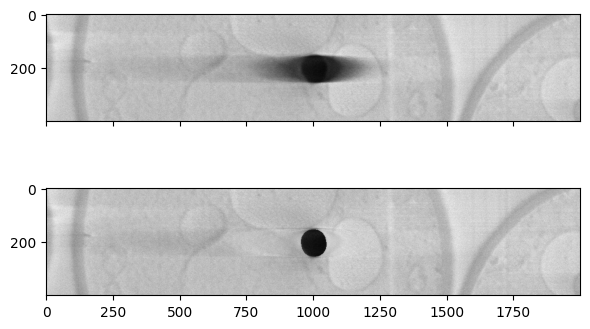

In [16]:
fig, (ax0,ax1)= plt.subplots(2,1, figsize=(6,4), sharex=True)
ax0.imshow(data_crop)
ax1.imshow(resimg)
plt.tight_layout()